In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Question 1 :
    Create a random 2-D numpy array with 1500 values. Simulate different
    lines of fit using 1000 values from the array and find the errors for each of
    these lines. Find the line with the least error among these lines and store
    it as the line of best fit. Using this line of best fit, predict the target variable
    for the other 500 values.

### Class Native to The given Question 
    Essentially Create A Random 2-D Array with NOT Normal Distribution Of random Function
    So I Used Triangular Distribution . The Normal Distribution of Random Numbers is not suitable for Linear Fit As such
    So Triangular Dist. is the closest to a nice data set for a fit
#### PreProcessPipeline:
    Perform The required pre-processing by 
   <ul>
   <li>
    Initializing 2-d matrix (750x2)->1500 val
   </li>
   <li>
    Convert to a DataFrame to work with and Rename columns
   </li>
    
    

In [3]:
'''
    Pre Processing is not Generic Though I have made it Generic to THIS Problem 
'''
class PreProcessPipeline():
    def __init__(self):
        dataFrame=pd.DataFrame(np.random.triangular(-50,0,50,size=(750,2)))
        dataFrame=dataFrame.rename(columns={0:"X",1:"Y"})
        
        self.dataframe=dataFrame
        self._shuffle_data()
    def _shuffle_data(self):
        self.dataframe= self.dataframe.sample(frac=1).reset_index(drop=True)
    def X(self):
        return self.dataframe.iloc[:,:-1]["X"]
    def Y(self):
        return self.dataframe.iloc[:,-1]
pp=PreProcessPipeline()
x=pp.X()
y=pp.Y()
pp.dataframe

,X,Y
0,-5.896139,-31.366515
1,22.859973,43.855882
2,19.868953,-30.340640
3,-8.725671,24.165779
4,-3.844669,-34.725239
...,...,...
745,15.796465,-18.244530
746,10.987624,30.929544
747,33.946575,-9.842638
748,-15.955341,-2.775280


### Class To Perform Train Test Split 

In [54]:
class Train_Test_Split:
    def __init__(self,x,y,split_size=0.667):
        self.x=x
        self.y=y
        self.split_size=split_size
    def split(self):
        return (x[:round(self.x.size*self.split_size)],x[round(self.x.size*self.split_size):],y[:round(self.y.size*self.split_size)],y[round(self.y.size*self.split_size):])

In [5]:
x_train,x_test,y_train,y_test=Train_Test_Split(x,y).split()

### Simulation Model 
    This Class Performs Multiple Random Line Fits By Altering its weight (m) and Bias (_intercept).
    and we select the best parameters based on the Error computed.

In [7]:
class LinearFitSimulation():
    def __init__(self,x_train,x_test,y_train,y_test,epochs=500):
        self.epochs=epochs
        self.x_train=x_train
        self.x_test=x_test
        self.y_train=y_train
        self.y_test=y_test
    def predict(self):
        best_err=np.inf
        best_line=None
        for i in range(self.epochs):
            m=np.random.randn()
            c=np.random.randn()
            y_pred=m*self.x_train+c
            err= Error_Suite(self.y_train,y_pred).mse()
        if err<best_err:
            best_err=err
            best_line=(m,c)
        return (best_line,best_err,x_test*best_line[0]+best_line[-1])

### Error Suite Class
    Essentially A Generic Class To compute Various Error Metrics from (y_test,y_pred) for sake of conveinience

In [55]:
class Error_Suite:
    def __init__(self,y_test,y_pred):
        self.y_test=y_test
        self.y_pred=y_pred
        self.size=y_test.size
    def mse(self):
        return(np.mean((self.y_test-self.y_pred)**2))
    def mae(self):
        return (abs(self.y_test-self.y_pred).sum()/self.size)
    def mape(self):
        return (abs((self.y_test-self.y_pred)/self.y_test)).sum()*100/self.size
    def rmse(self):
        return self.mse()**0.5

### Plot Function
    Again For convenience sake and Code Reusablity . I wrote down this fn.

In [8]:
class Plot():
    def __init__(self,x_test,y_test,y_pred):
        self.x_test=x_test
        self.y_test=y_test
        self.y_pred=y_pred
        plt.scatter(x_test,y_test)
        plt.plot(x_test,y_pred)

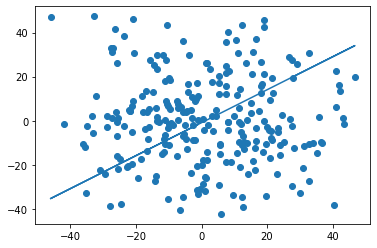

In [19]:
l=LinearFitSimulation(x_train,x_test,y_train,y_test,epochs=1000).predict()
z=Plot(x_test,y_test,l[-1])


### Interpretation 
    The Given Data or the data that I had Used is A Triangular Distribution (-50,0,50) which follows Somewhat Linear Ascent till Mode And Descent from Mode to the right . So the Fit May Not be Exact since the distribution peaks around 0 and descends around [0,50)

### Question 2:
    Use the data1.csv to build a simple linear regression from scratch without
    using sklearn libraries and print the RMSE and mean absolute error values.
    Use both the equations available in the slides (in theory page) to build the
    model and compare the intercept and coefficient values

### Simple Linear Regression Model
    This Class Essentially Performs Linear Regression using Least Squares Method.

In [52]:
class SimpleLRModel():
    def __init__(self,x_train,x_test,y_train,y_test):
        self.x_train=x_train.flatten()
        self.x_test=x_test.flatten()   # This is necessary because without flattening each element in x_test/train will be a sub array then being a 2-d array messing up the computation 
        self.y_train=y_train
        self.y_test=y_test
        self._slope=0
        self._intercept=0
        
        
    def fit(self):
        n=len(self.x_train)
        m_n=n*((self.x_train*self.y_train).sum())-(self.x_train.sum()*(self.y_train.sum()))
        m_d=n*((self.x_train**2).sum())-((self.x_train).sum())**2
        self._slope=m_n/m_d
        self._intercept=((self.y_train.sum())-self._slope*(self.x_train.sum()))/n
        return (self._slope,self._intercept)
    
    def predict(self):
        return self._slope*x_test+self._intercept
    
    
    

### Simple Linear Regression Model Using Pearson Coeffiecient
    

In [51]:
class SimpleLRModel_Pearson():
    def __init__(self,x_train,x_test,y_train,y_test):
        self.x_train=x_train.flatten()
        self.x_test=x_test.flatten()   # This is necessary because without flattening each element in x_test/train will be a sub array then being a 2-d array messing up the computation 
        self.y_train=y_train
        self.y_test=y_test
        self._slope=0
        self._intercept=0
        
        
    def fit(self):
        x_mean=self.x_train.mean()
        y_mean=self.y_train.mean()
        x_std=np.sqrt(((self.x_train-x_mean)**2).sum()/len(self.x_train))
        y_std=np.sqrt(((self.y_train-y_mean)**2).sum()/len(self.y_train))
        #z_x=(self.x_train-x_mean)/x_std
        #z_y=(self.y_train-y_mean)/y_std
        #r=(z_x*z_y).sum()/len(self.x_train)-1
        r=((self.x_train-x_mean)*(self.y_train-y_mean)).sum()/np.sqrt(((self.x_train-x_mean)**2).sum()*((self.y_train-y_mean)**2).sum())
        
        b1=r*(y_std/x_std)
        
        b0=y_mean-b1*x_mean
        self._slope =b1
        self._intercept=b0
        return (b1,b0)
    
    def predict(self):
        return self._slope*x_test+self._intercept
    

### Data Pre processing 


In [48]:
data=pd.read_csv(r"D:\data1.csv")
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [56]:
x_train,x_test,y_train,y_test=Train_Test_Split(x,y).split()

### Model Training (Least Squares)

In [57]:
lrm=SimpleLRModel(x_train,x_test,y_train,y_test)
lrm.fit()

(3.1792452830188678, 30.10377358490566)

### Model prediction (Least Squares)

In [58]:
y_pred=lrm.predict().flatten()
(y_pred,y_test)

(array([84.1509434 , 71.43396226, 68.25471698, 77.79245283, 80.97169811,
        74.61320755, 80.97169811, 80.97169811, 87.33018868, 90.50943396,
        84.1509434 , 71.43396226, 68.25471698, 77.79245283, 80.97169811,
        74.61320755, 80.97169811, 80.97169811, 87.33018868, 90.50943396,
        84.1509434 , 71.43396226, 68.25471698, 77.79245283, 80.97169811,
        74.61320755, 80.97169811, 80.97169811, 87.33018868, 90.50943396,
        84.1509434 , 71.43396226, 68.25471698, 77.79245283, 80.97169811,
        74.61320755, 80.97169811, 80.97169811, 87.33018868, 90.50943396]),
 array([94, 73, 59, 80, 93, 85, 66, 79, 77, 91, 94, 73, 59, 80, 93, 85, 66,
        79, 77, 91, 94, 73, 59, 80, 93, 85, 66, 79, 77, 91, 94, 73, 59, 80,
        93, 85, 66, 79, 77, 91], dtype=int64))

### Model Error Metrics (Least Squares)

In [59]:
mse=Error_Suite(y_test,y_pred).mse()
rmse=Error_Suite(y_test,y_pred).rmse()
mape=Error_Suite(y_test,y_pred).mape()
mae=Error_Suite(y_test,y_pred).mae()

print(f"Mean Squared Error :{mse}\nRoot Mean Squared Error:{rmse}\nMean Percentage Error:{mape}\nMean AbsoluteError:{mae}\n")

Mean Squared Error :77.75377358490566
Root Mean Squared Error:8.817810022046611
Mean Percentage Error:9.535691016912438
Mean AbsoluteError:7.30566037735849



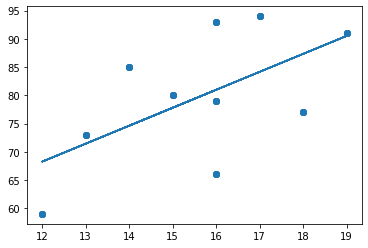

In [60]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred)

### Model Fit Using Pearson Correlation 

In [61]:
reg=SimpleLRModel_Pearson(x_train,x_test,y_train,y_test)
reg.fit()

(3.179245283018868, 30.10377358490566)

In [62]:
y_pred_pearson=reg.predict()
(y_test,y_pred_pearson.flatten())

(array([94, 73, 59, 80, 93, 85, 66, 79, 77, 91, 94, 73, 59, 80, 93, 85, 66,
        79, 77, 91, 94, 73, 59, 80, 93, 85, 66, 79, 77, 91, 94, 73, 59, 80,
        93, 85, 66, 79, 77, 91], dtype=int64),
 array([84.1509434 , 71.43396226, 68.25471698, 77.79245283, 80.97169811,
        74.61320755, 80.97169811, 80.97169811, 87.33018868, 90.50943396,
        84.1509434 , 71.43396226, 68.25471698, 77.79245283, 80.97169811,
        74.61320755, 80.97169811, 80.97169811, 87.33018868, 90.50943396,
        84.1509434 , 71.43396226, 68.25471698, 77.79245283, 80.97169811,
        74.61320755, 80.97169811, 80.97169811, 87.33018868, 90.50943396,
        84.1509434 , 71.43396226, 68.25471698, 77.79245283, 80.97169811,
        74.61320755, 80.97169811, 80.97169811, 87.33018868, 90.50943396]))

### Model Error metrics (Pearson Correlation)

In [64]:
mse=Error_Suite(y_test,y_pred_pearson.flatten()).mse()
rmse=Error_Suite(y_test,y_pred_pearson.flatten()).rmse()
mape=Error_Suite(y_test,y_pred_pearson.flatten()).mape()
mae=Error_Suite(y_test,y_pred_pearson.flatten()).mae()

print(f"Mean Squared Error :{mse}\nRoot Mean Squared Error:{rmse}\nMean Percentage Error:{mape}\nMean AbsoluteError:{mae}\n")

Mean Squared Error :77.75377358490564
Root Mean Squared Error:8.81781002204661
Mean Percentage Error:9.535691016912434
Mean AbsoluteError:7.305660377358488



### Regression Line Plot

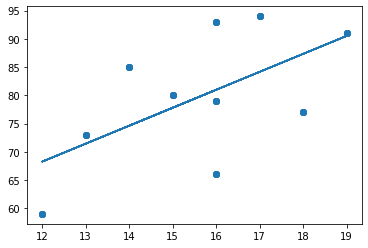

In [46]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred_pearson)

### Inference 
    Thus the equations obtained are the same and the Errors obtained are comparably similar in magnitude.
    